## **TASK 2: Exploratory Data Analysis (EDA)**

<div style="text-align: right; font-size: 20px;"><strong>SUBMITTED BY : ARJUN UNNIKRISHNAN</strong></div>



### 1: Load and Explore Dataset

In [3]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head(10)


Dataset Shape: (891, 12)

Column Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2.Summary Statistics

In [5]:
numeric_summary = df.describe()
categorical_summary = df.describe(include=['object'])
print("Numeric Summary:\n", numeric_summary)
print("\nCategorical Summary:\n", categorical_summary)

print("\nMedian Age:", df['Age'].median())
print("Standard Deviation of Fare:", df['Fare'].std())
print("Value Counts of Embarked:\n", df['Embarked'].value_counts(dropna=False))


Numeric Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Categorical Summary:
                            Name   Sex  T

### 3. Histograms and Boxplots

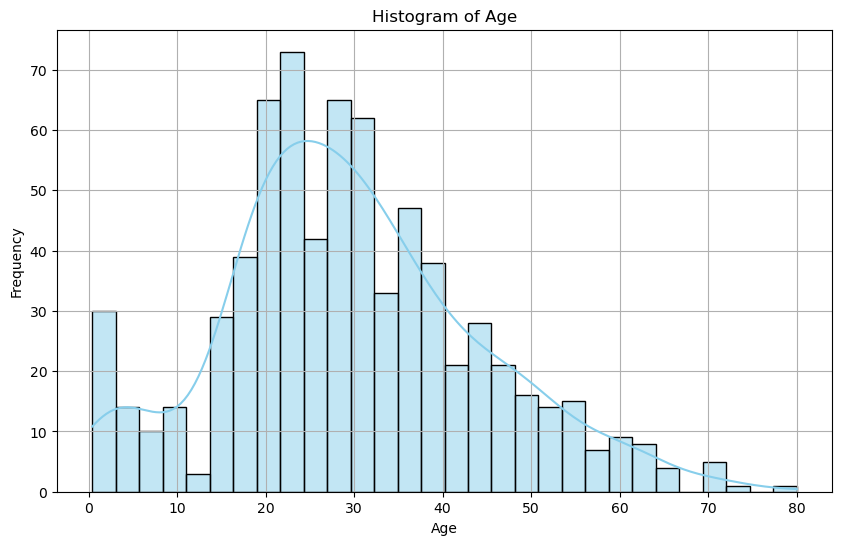

C:\Users\ARJUN\AppData\Local\Temp\ipykernel_9576\3677604384.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')


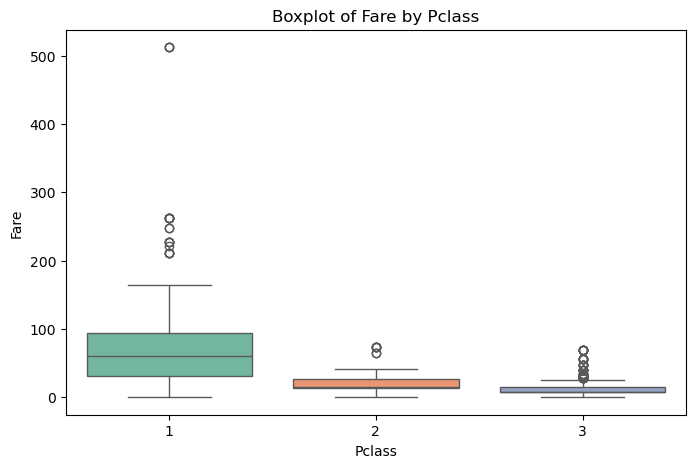

C:\Users\ARJUN\AppData\Local\Temp\ipykernel_9576\3677604384.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')


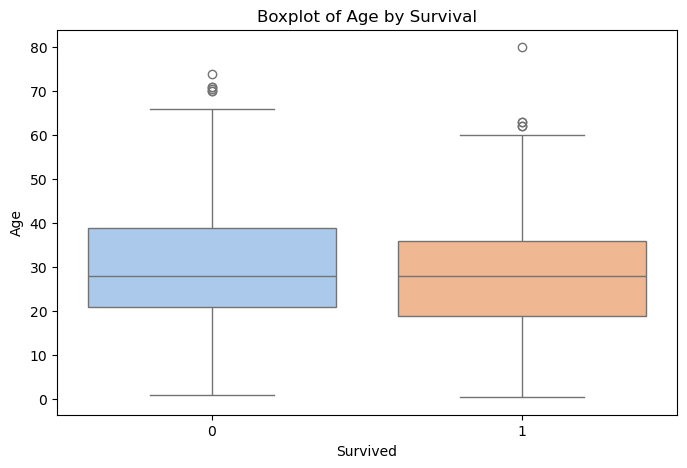

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Boxplot of Fare by Pclass')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Boxplot of Age by Survival')
plt.show()


### 4. Correlation Matrix and Pairplot

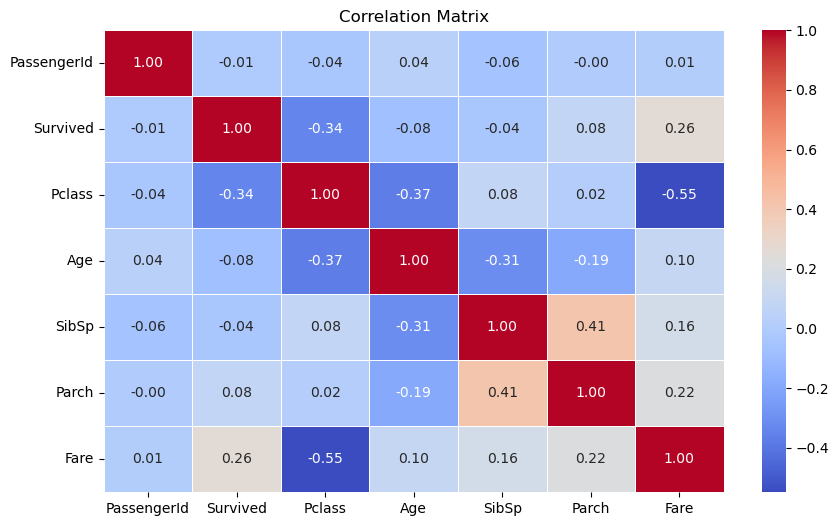

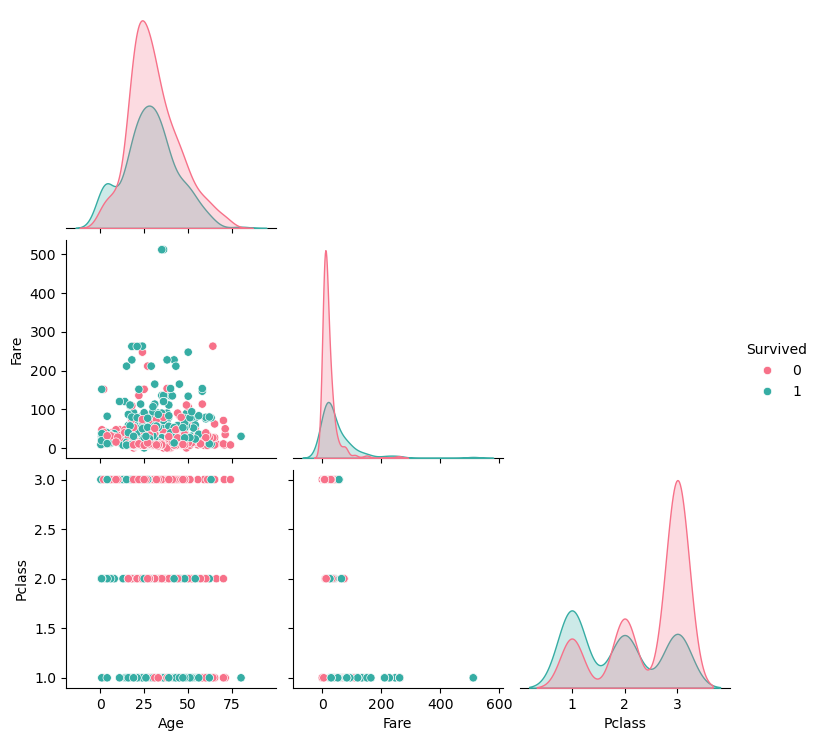

In [9]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

selected_features = df[['Age', 'Fare', 'Pclass', 'Survived']].dropna()
sns.pairplot(selected_features, hue='Survived', palette='husl', corner=True)


### 5. Plotly Visualization

In [21]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

fig1 = px.histogram(
    df,
    x='Pclass',
    color='Survived',
    barmode='group',
    facet_col='Sex',
    title='Survival Count by Pclass and Sex'
)
fig1.update_layout(bargap=0.2)
fig1.show()

fig2 = px.box(
    df,
    x='Sex',
    y='Age',
    color='Survived',
    title='Age Distribution by Sex and Survival'
)
fig2.show()
